# Machine Learning - Andrew Ng ( Python Implementation)

## Univariable Linear Regression

### Loading of Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("Uni_linear.txt", header=None)

In [3]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Ploting of Data

Text(0.5, 1.0, 'Profit Prediction')

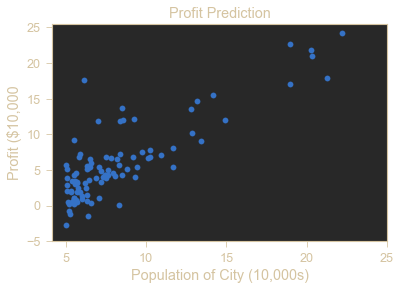

In [5]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Prediction")

### Compute the Cost Function $J(\Theta)$

$J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)} )^2$

In [6]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter
    in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [7]:
data_n=data.values
m=data_n[:,0].size
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))

computeCost(X,y,theta)

32.072733877455676

### Gradient Descent

Minimize the cost function $J(\Theta)$ 

By updating Equation and repeat unitil convergence
        
$\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\Theta_j$ for all $j$)

In [8]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [9]:
theta,J_history = gradientDescent(X,y,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.63 + 1.17x1


### Visualising the Cost Function $J(\Theta)$

In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [11]:
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

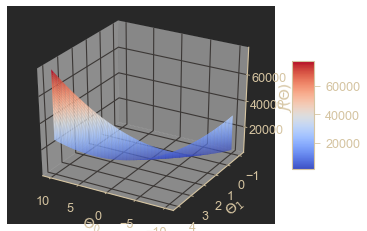

In [12]:
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)


### Testing the implementation

Plot $J(\Theta)$ against the number of iteration 

Text(0.5, 1.0, 'Cost function using Gradient Descent')

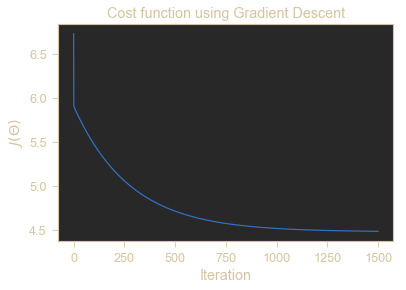

In [13]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Graph with Line of Best Fit

Text(0.5, 1.0, 'Profit Prediction')

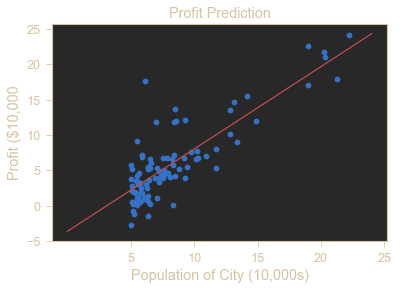

In [14]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Prediction")

### Make predictions using the optimized $\Theta$ values

$h_\Theta(x) = \Theta^Tx$

In [15]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]

In [16]:
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

For population = 35,000, we predict a profit of $4520.0


In [17]:
predict2=predict(np.array([1,7]),theta)*10000
print("For population = 70,000, we predict a profit of $"+str(round(predict2,0)))

For population = 70,000, we predict a profit of $45342.0


## Multivariable Linear Regression

### Loading of Data

In [18]:
data2=pd.read_csv("Multi_linear.txt", header=None)

In [19]:
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [20]:
data2.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Ploting of Data

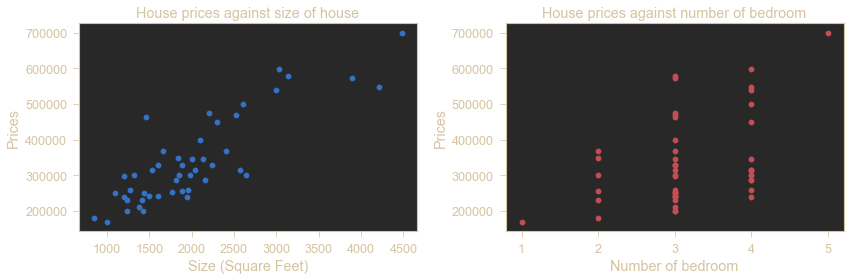

In [21]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)

axes[0].scatter(data2[0],data2[2],color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data2[1],data2[2],color="r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")

# Enhance layout
plt.tight_layout()

### Feature Normalization

To make sure features are on a similar scale:

$x_i = \frac{x_i - \mu_i}{\sigma_i}$

In [22]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [23]:
data_n2=data2.values
m2=len(data_n2[:,-1])
X2=data_n2[:,0:2].reshape(m2,2)
X2, mean_X2, std_X2 = featureNormalization(X2)
X2 = np.append(np.ones((m2,1)),X2,axis=1)
y2=data_n2[:,-1].reshape(m2,1)
theta2=np.zeros((3,1))

### Compute Cost $J(\Theta)$

In the multivariate case, the cost function can also be written in the following vectorized form:

$J(\Theta) = \frac{1}{2m} (X\Theta - \overrightarrow{y})^T (X\Theta - \overrightarrow{y})$

In [24]:
computeCost(X2,y2,theta2)

65591548106.45744

### Gradient Descent

In [25]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,0.1,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =340412.66 + 109447.8x1 + -6578.35x2


### Visualising the Cost Function $J(\Theta)$

Text(0.5, 1.0, 'Cost function using Gradient Descent')

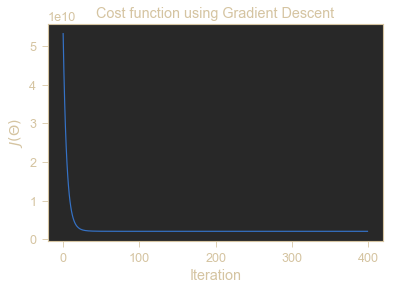

In [26]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Make predictions using the optimized $\Theta$ values

In [27]:
#feature normalisation of x values
x_sample = featureNormalization(np.array([1650,3]))[0]
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))

For size of house = 1650, Number of bedroom = 3, we predict a house value of $456439.0
